In [4]:
# 필요한 것들 호출
from PIL import Image
import glob

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


# 가위 resize
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper_train/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper_test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 resize
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper_train/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper_test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

#보 resize
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper_train/paper"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper_test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper_train/paper"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper_test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

# Labeling
import numpy as np

def load_data(img_path, number_of_data=3393):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper_train"
(x_train, y_train)=load_data(image_dir_path, 3393)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper_test"
(x_test, y_test)=load_data(image_dir_path, 416)
x_test_norm = x_test / 255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

1086  images to be resized.
1086  images resized.
145  images to be resized.
145  images resized.
가위 이미지 resize 완료!
1313  images to be resized.
1313  images resized.
130  images to be resized.
130  images resized.
바위 이미지 resize 완료!
994  images to be resized.
994  images resized.
128  images to be resized.
128  images resized.
보 이미지 resize 완료!
994  images to be resized.
994  images resized.
128  images to be resized.
128  images resized.
보 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 3393 입니다.
학습데이터(x_train)의 이미지 개수는 403 입니다.
x_test shape: (416, 28, 28, 3)
y_test shape: (416,)
x_train shape: (3393, 28, 28, 3)
y_train shape: (3393,)


In [46]:
# 네트워크 설계하기
import tensorflow as tf
from tensorflow import keras
import numpy as np


n_channel_1=16
n_channel_2=32
n_dense=128

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

#  train test reshape하기
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))


print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

# 모델 학습하기
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=20)

# 모델 성능평가하기
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_84 (Dropout)         (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_85 (Dropout)         (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_42 (Flatten)         (None, 800)             

# 회고

## 모델 성능을 향상 시키기 위한 시도

### 1. 하이퍼파라미터 값 바꾸기

- trian data :3927개, test data : 300개로 고정하고 하이퍼파라미터 값들 만을 변화하여 실시

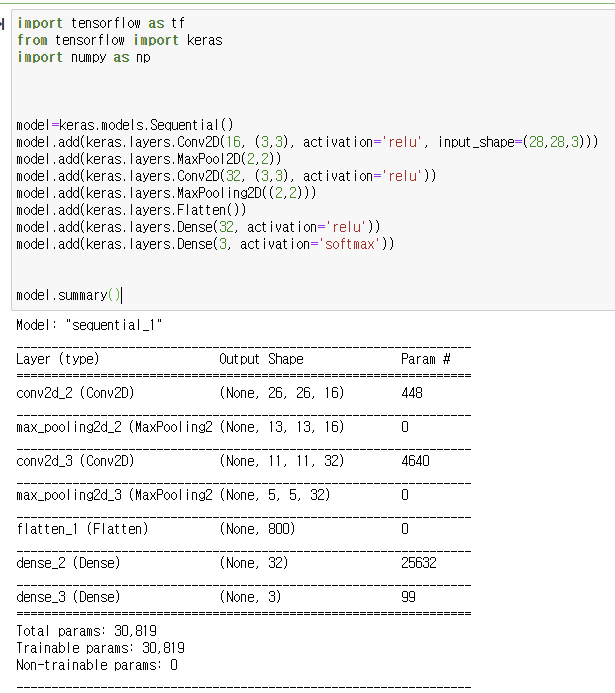



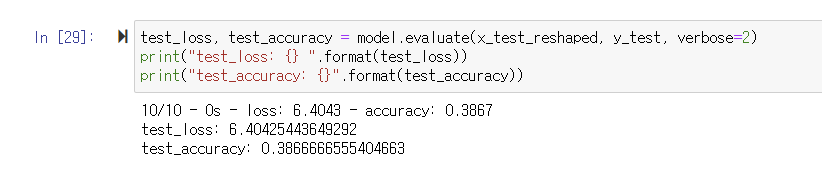

위의 사진이 Default값을 설정한 것으로 38.67%가 나왔다. 그 이후로
conv_2d_(2,3), Dense, Epoch 값들을 변경해보았지만 43.3%이상 올라가지 않았다
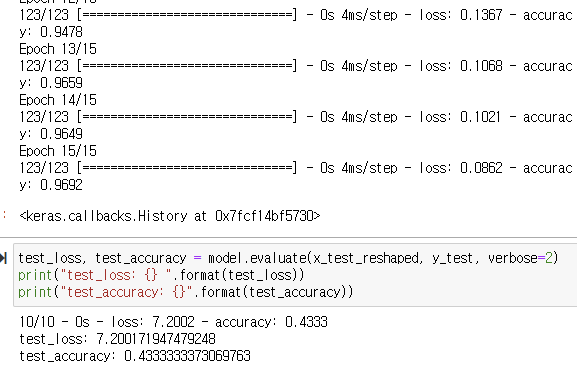

### 2. 층을 여러개 사용하는데 추가되는 층을 dropout 사용
- 과적합이 문제인 것 같아서 해결하는 방법들을 찾아보다보니 dropout을 발견
- 하지만 사용법을 몰라 여러군데를 참조
- 개념 참조 : https://heytech.tistory.com/125
- 코드 참조 : https://limitsinx.tistory.com/60

### 3. train & test 데이터 수집&정리하기

- 하이퍼 파라미터에서의 한계를 느끼고 데이터 자체의 선별 & 수집을 실시
- trian & test 의 사진들 중에서 컴퓨터가 인식하기 어려울 듯한 난잡한 사진 제거
- 추가로 어렵지 않은 사진들을 추가했다. 앞의 시도에 비해 train data의 숫자 자체는 줄었지만 인식률 좋을 법한 사진들로 대체
- train & test의 비율이 너무 안 좋은 것 같기도 해서 test데이터의 양도 늘리고 train 데이터를 조금 줄인 이유도 있다.
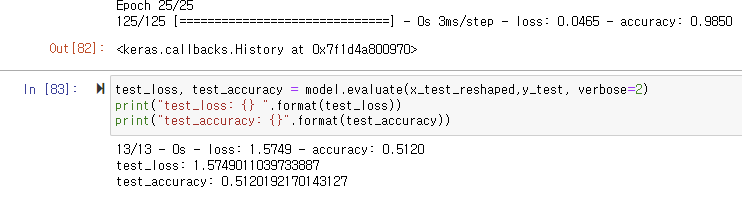

그 결과 정확도가 50%를 돌파하였다.

### 4. 2번의 결과에서 하이퍼파라미터 조정

- 이 파일에 있는 것처럼 54.57%까지 확인되었다.
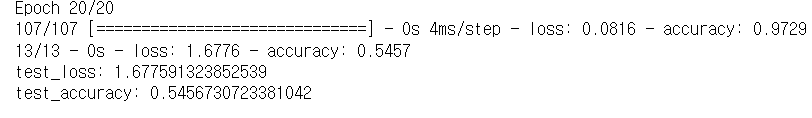

## 느낀점


첫 exploration이라서 여러 우여곡절이 있었다.
첫째로 train data와 test data를 분리하는 것이었다. fundermental노드에서 진행한 mnist자료는 자동으로 분류되어 있어서 데이터 셋을 나눠야 하는 과정이 없다보니 그 필요성을 인지하고 있었음에도 코드상으로 어떻게 구현해야될지 어려웠던 것 같다. 폴더를 나누고 그 폴더를 지정하는 간단한 것도 처음부터 스스로하려니 자꾸 오류가 났다. 리눅스 활용에 대한 미숙과 코딩 실력부족으로 인해 자잘한 오류가 많이 생기다보니 조금 짜증이나고 조급해졌다. 
둘째로 모델 성능에 대한 문제를 겪었다. 기본적인 틀을 만들어서 처음 시도했을때 38%정도가 나왔다. 처음에는 하이퍼파라미터의 변화정도로 어디까지 끌어올릴 수 있나가 궁금해서 그걸 먼저 조정해보는 시도를 했다. 하지만 결과는 42%까지 올리는 게 고작이었다. 그리고 하이퍼파라미터의 변화에 대한 문제는 그 해당하는 layers가 뭘 의미하는지를 이해하고 쓴 것이 아니라(노드에 있는 코드를 그대로 씀) 그 숫자를 이 데이터 형태에 있어서는 어떻게 변화시키는 것이 유의미한지를 모르고 약간 막무가내로 변화시켜봤던 것이 문제였던것 같다. 그리고 심지어 같은 코딩이어도 랜덤한 정확도가 나오다보니 상승해도 하락해도 이것이 파라미터의 영향인지 단순 오차범위 안의 변화인지 알 수가 없어서 정말 말이 안되는 확률이 아니라면 그 차이를 체감하기가 어려웠다. 그래서 어느 정도의 안정된 값까지만 찾고 파라미터에서 확률을 높이는 것을 포기하고 input 데이터를 정리하는 방향을 잡았다. 
셋째로 과적합이 문제인 것 같아서 해결방법을 구글링을 하다보니 dropout이라는 방법을 찾게 되었는데 스스로 공부하고 적용하려고 하다보니 이것저것 보게 되고 코딩으로 적용하는데 시간이 쫌 걸렸다. 
마지막으로 데이터를 정리하는 과정이었는데 train 과 test의 비율을 어느 정도 맞추는 것도 어려웠다. 이것도 문제였는지는 모르겠지만 초기의 train과 test비율이 10:1정도였다 내가 알기로를 8:2가 이상적인 걸로 아는데 이것도 낮은 성능의 이유였을지도 모른다고 생각했다. 그래서 데이터를 줄이는 것 이외에도 아까 언급한 drop out을 찾아낸 것도 있다. 또한 내가 컴퓨터가 아니다보니 컴퓨터가 학습하기 효율적인 사진의 기준을 정하고 정리하는 것도 시간이 많이 걸렸다. 그 과정에서 나는 train 데이터는 다른 분들의 데이터를 쓰고 test데이터에 내가 찍은 데이터를 넣었는데 train도 복잡해 보이는 것들을 정리했지만 무엇보다 내가 찍은 사진이 배경이 난잡한 것 같아서 흰 배경에 다시 찍어서 데이터를 처음부터 다시 다 정리하는 과정이 있었다. 매우 시간이 오래 걸렸고 귀찮아서 너무 스트레스 받았지만 결국 결과는 데이터를 건드리자 50%대가 깨지고 55%수준까지 가게 되었다. 물론 이 수준도 60%가 안되어서 부족하지만 그래도 뭔가 스스로 뿌듯했다.

위의 내용은 내가 겪은 문제점과 해결하는 과정이었고 내가 느낀 것들을 적어보려고 한다. 기본적으로 내가 어떤 조치를 했을 때 그 수치들이 다이나믹하게 증가하는 것이 아니라 소폭 증가하면 오차 범위 안인가 내가 조치를 해서 올라간 것인가 라는 확신이 들지 않는 것이 너무 어려웠다. 그리고 코드 자체도 내가 일일히 짠 것이 아니라 기본 프레임에 필요한 요소요소만 추가하다보니 내가 이걸 정말 다 해낸 것인가라는 생각이 들기도 했다. 그래도 이 부분은 오류를 수정하고 여러 시도를 해보면서 코드 흐름을 공부하고 이해하게 되면서 내가 전부 다 직접 코딩할 수 있겠다라고 자신이 든 것은 아니지만 그래도 원리와 구조에 대해서 이해를 하게 된 것 같아서 학습 효과는 느낀 것 같다. 그리고 데이터 형태를 보고 내가 원하는 라이브러리, 모듈 등을 주체적으로 호출하고 layers도 어떤 형태가 효율적일지 판단이 되는 날이 오기를 고대하게 된 것 같다. 물론 무언가 해냈다는 성취감도 컸지만 반대로 내가 가야할 길이 멀다는 것을 실질적으로 느끼게 된 경험이었던 것 같다. 그리고 무엇보다 성능평가에 대한 지표가 랜덤성이 있다보니 각자 나오는 수치들에 대한 불확실성이 있었다. 55%가 항상 나오는 것이 아니라 max값이었고 일정하지 않은 이유는 데이터 전처리과정에서 일관되게 학습하기 좋은 데이터를 제공하지 못한 것이 아닌가라는 생각이 들었다. 그래서 학습하는 데이터에 따라 성능이 편차가 커지는 상황이 벌어진 것은 아닐까라고 판단했다. 우연히 좋은 데이터들로 학습을 하면 성능이 올라가고 학습하기 어려운 데이터로 학습하면 성능이 떨어지는 것이라고 스스로는 판단을 했다.